In [1]:
import pandas as pd
sales_data = pd.read_csv('Advertising.csv')

In [3]:
sales_data.head(10) 

,TV,Radio,Newspaper,Area,Prod_type,Sales
0,230.1,37.8,69.2,suburban,Basic,38.0
1,44.5,39.3,45.1,rural,Higher,10.4
2,17.2,45.9,69.3,rural,Medium,9.3
3,151.5,41.3,58.5,suburban,Medium,18.5
4,180.8,10.8,58.4,suburban,Higher,12.9
5,8.7,48.9,75.0,rural,Basic,7.2
6,57.5,32.8,NaN,urban,Basic,11.8
7,120.2,19.6,11.6,suburban,Higher,13.2
8,8.6,NaN,1.0,rural,Medium,4.8
9,199.8,2.6,21.2,rural,Medium,10.6


In [4]:
sales_data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,198.000000,198.000000,200.000000
mean,149.635500,23.462626,30.621717,15.591500
std,97.035865,14.787748,21.878334,8.332438
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,10.225000,12.650000,10.375000
50%,149.750000,23.450000,26.050000,13.350000
75%,218.825000,36.575000,45.100000,18.925000
max,800.000000,49.600000,114.000000,52.000000


In [8]:
#sales_data.isnull()
sales_data.isnull().sum()

TV           0
Radio        2
Newspaper    2
Area         0
Prod_type    0
Sales        0
dtype: int64

In [11]:
sales_data.isnull().sum(axis=1).head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    1
7    0
8    1
9    0
dtype: int64

In [19]:
#radio_null=sales_data[sales_data.Radio.isnull()]
#news_null=sales_data[sales_data.Newspaper.isnull()]
#radio_null
#news_null
#sales_data.isnull().any(axis=1)
sales_data[sales_data.isnull().any(axis=1)] 

,TV,Radio,Newspaper,Area,Prod_type,Sales
6,57.5,32.8,NaN,urban,Basic,11.8
8,8.6,NaN,1.0,rural,Medium,4.8
10,66.1,5.8,NaN,rural,Higher,8.6
21,237.4,NaN,23.5,suburban,Higher,12.5


In [20]:
import numpy as np

Radio_mean = np.mean(sales_data.Radio)
Radio_mean
sales_data.Radio = sales_data.Radio.fillna(Radio_mean)
sales_data

Newspaper_mean = np.mean(sales_data.Newspaper)
sales_data.Newspaper = sales_data.Newspaper.fillna(Newspaper_mean)

In [21]:
sales_data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Area         0
Prod_type    0
Sales        0
dtype: int64

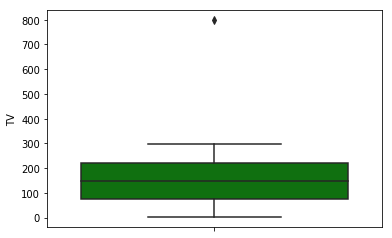

In [23]:
import seaborn as sns
sns.boxplot(sales_data.TV, color = "green", orient = "v");

In [33]:
clean_data = sales_data.drop(sales_data[sales_data.TV == 800].index)
clean_data

,TV,Radio,Newspaper,Area,Prod_type,Sales
0,230.1,37.800000,69.200000,suburban,Basic,38.0
1,44.5,39.300000,45.100000,rural,Higher,10.4
2,17.2,45.900000,69.300000,rural,Medium,9.3
3,151.5,41.300000,58.500000,suburban,Medium,18.5
4,180.8,10.800000,58.400000,suburban,Higher,12.9
5,8.7,48.900000,75.000000,rural,Basic,7.2
6,57.5,32.800000,30.621717,urban,Basic,11.8
7,120.2,19.600000,11.600000,suburban,Higher,13.2
8,8.6,23.462626,1.000000,rural,Medium,4.8
9,199.8,2.600000,21.200000,rural,Medium,10.6


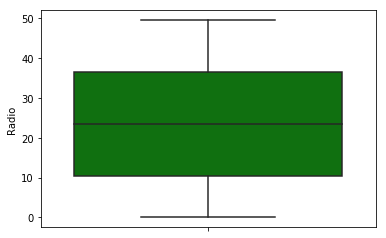

In [34]:
sns.boxplot(clean_data.Radio, color = "green", orient = "v");

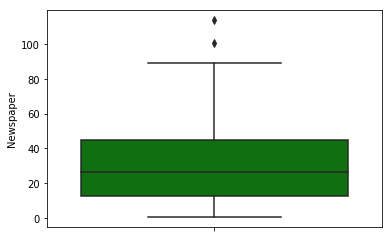

In [35]:
sns.boxplot(clean_data.Newspaper, color = "green", orient = "v");

In [47]:
final_data=clean_data.drop(clean_data[clean_data.Newspaper >80].index)
final_data

,TV,Radio,Newspaper,Area,Prod_type,Sales
0,230.1,37.800000,69.200000,suburban,Basic,38.0
1,44.5,39.300000,45.100000,rural,Higher,10.4
2,17.2,45.900000,69.300000,rural,Medium,9.3
3,151.5,41.300000,58.500000,suburban,Medium,18.5
4,180.8,10.800000,58.400000,suburban,Higher,12.9
5,8.7,48.900000,75.000000,rural,Basic,7.2
6,57.5,32.800000,30.621717,urban,Basic,11.8
7,120.2,19.600000,11.600000,suburban,Higher,13.2
8,8.6,23.462626,1.000000,rural,Medium,4.8
9,199.8,2.600000,21.200000,rural,Medium,10.6


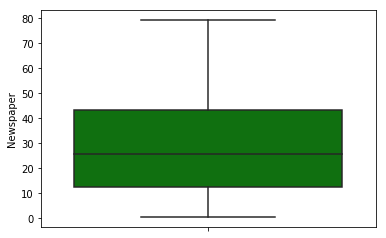

In [48]:
sns.boxplot(final_data.Newspaper, color = "green", orient = "v");

In [49]:
final_data.describe()

,TV,Radio,Newspaper,Sales
count,195.000000,195.000000,195.000000,195.000000
mean,146.212821,23.245771,29.125351,15.455897
std,84.812101,14.654163,19.654830,8.259384
min,0.700000,0.000000,0.300000,1.600000
25%,74.900000,10.350000,12.500000,10.350000
50%,149.700000,23.300000,25.600000,13.300000
75%,218.050000,35.700000,43.150000,18.700000
max,293.600000,49.600000,79.200000,52.000000


In [50]:
final_data.Area.unique()

array(['suburban', 'rural', 'urban'], dtype=object)

In [51]:
final_data.Area.value_counts()

rural       93
suburban    80
urban       22
Name: Area, dtype: int64

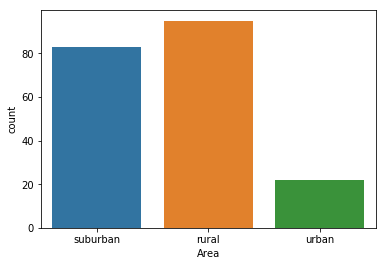

In [52]:
sns.countplot(x="Area", data=sales_data)

In [54]:
final_data.Prod_type.value_counts()

Higher    68
Basic     68
Medium    59
Name: Prod_type, dtype: int64

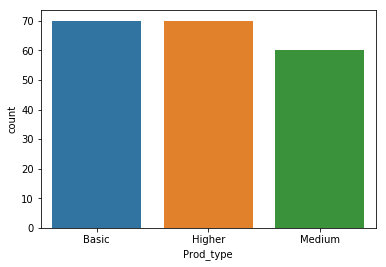

In [55]:
sns.countplot(x="Prod_type", data=sales_data)

In [56]:
final_data.head()

,TV,Radio,Newspaper,Area,Prod_type,Sales
0,230.1,37.8,69.2,suburban,Basic,38.0
1,44.5,39.3,45.1,rural,Higher,10.4
2,17.2,45.9,69.3,rural,Medium,9.3
3,151.5,41.3,58.5,suburban,Medium,18.5
4,180.8,10.8,58.4,suburban,Higher,12.9


In [57]:
final_data['Prod_type_encode'] = final_data['Prod_type'].astype("category", categories = ['Basic','Medium','Higher' ]).cat.codes
final_data.head()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  """Entry point for launching an IPython kernel.


,TV,Radio,Newspaper,Area,Prod_type,Sales,Prod_type_encode
0,230.1,37.8,69.2,suburban,Basic,38.0,0
1,44.5,39.3,45.1,rural,Higher,10.4,2
2,17.2,45.9,69.3,rural,Medium,9.3,1
3,151.5,41.3,58.5,suburban,Medium,18.5,1
4,180.8,10.8,58.4,suburban,Higher,12.9,2


In [60]:
last_final_data = pd.get_dummies(final_data, columns=['Area'])

In [61]:
last_final_data.head()

,TV,Radio,Newspaper,Prod_type,Sales,Prod_type_encode,Area_rural,Area_suburban,Area_urban
0,230.1,37.8,69.2,Basic,38.0,0,0,1,0
1,44.5,39.3,45.1,Higher,10.4,2,1,0,0
2,17.2,45.9,69.3,Medium,9.3,1,1,0,0
3,151.5,41.3,58.5,Medium,18.5,1,0,1,0
4,180.8,10.8,58.4,Higher,12.9,2,0,1,0


In [65]:
last_final_data=last_final_data.drop(['Prod_type'],axis=1)

In [67]:
last_final_data.head()

,TV,Radio,Newspaper,Sales,Prod_type_encode,Area_rural,Area_suburban,Area_urban
0,230.1,37.8,69.2,38.0,0,0,1,0
1,44.5,39.3,45.1,10.4,2,1,0,0
2,17.2,45.9,69.3,9.3,1,1,0,0
3,151.5,41.3,58.5,18.5,1,0,1,0
4,180.8,10.8,58.4,12.9,2,0,1,0
